In [1]:
from fastai import *
from fastai.vision import *

In [2]:
bs = 128

In [3]:
path = "../input/nonsegmentedv2/"

In [4]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=False), 
                                  size=224, num_workers=0, 
                                  bs=bs, valid_pct=0.2).normalize(imagenet_stats)

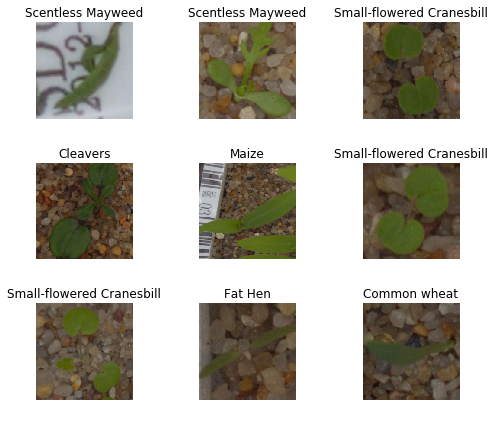

In [5]:
data.show_batch(rows=3, figsize=(7,6))

In [6]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /tmp/.torch/models/resnet18-5c106cde.pth
46827520it [00:01, 27552488.98it/s]


In [7]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.216423,1.145302,0.627823,02:13
1,1.424121,0.600483,0.795845,01:46
2,0.988846,0.462636,0.846432,01:48
3,0.737701,0.420919,0.850045,01:46
4,0.609262,0.410141,0.859079,01:46


In [8]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

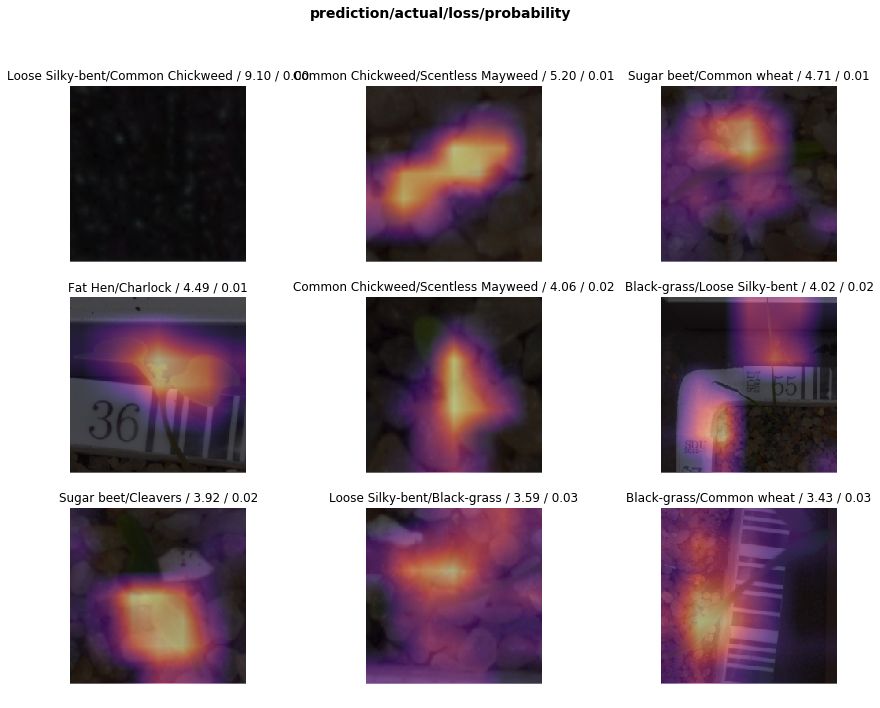

In [9]:
interp.plot_top_losses(9, figsize=(15,11))

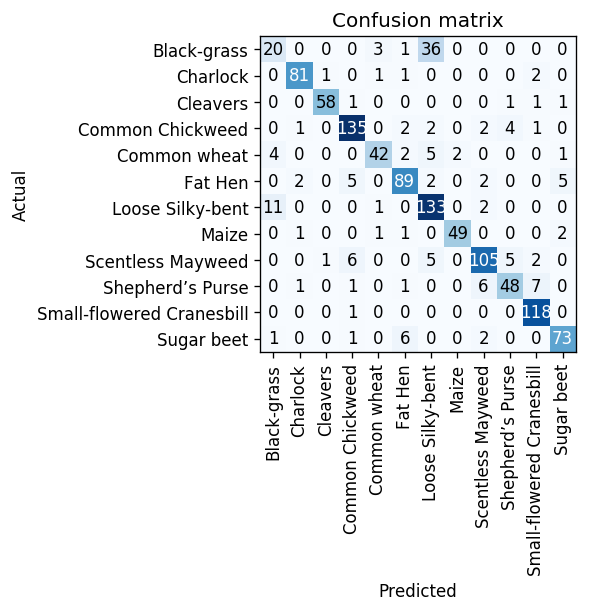

In [10]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=120)

In [11]:
learn.save("/kaggle/working/non-wd-stage-1")

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


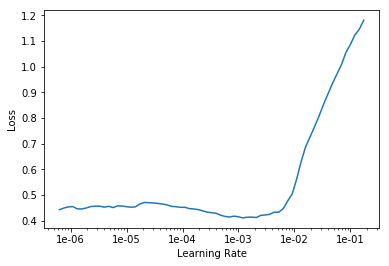

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.477705,0.397044,0.860885,01:46
1,0.450371,0.354014,0.873532,01:46
2,0.404684,0.328301,0.882565,01:48
3,0.374692,0.314707,0.887082,01:45
4,0.364087,0.314635,0.885276,01:47


In [16]:
learn.save("/kaggle/working/non-wd-stage-2")

In [17]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


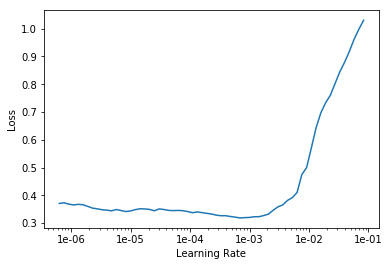

In [18]:
learn.lr_find()
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.337771,0.299516,0.891599,01:46
1,0.316058,0.293491,0.892502,01:46


In [20]:
learn.save("/kaggle/working/non-wd-stage-3")

## Weight decay = 0.1

The default weight decay in fastai is 1e-2 which is a little conservative. We try 1e-1 and see if we can get better results.

In [21]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy, model_dir="/tmp/model/", wd=1e-1)

In [22]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.179060,1.118271,0.621500,01:42
1,1.390410,0.587320,0.794941,01:44
2,0.980104,0.469888,0.846432,01:42
3,0.738071,0.421627,0.853659,01:41
4,0.609160,0.410852,0.855465,01:43


In [23]:
learn.save("/kaggle/working/wd-stage-1")

In [24]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


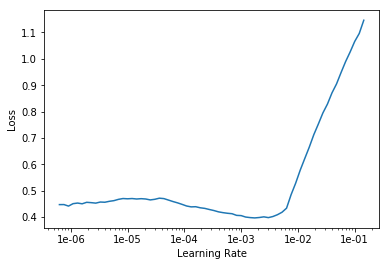

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.485904,0.390089,0.861789,01:45
1,0.453580,0.347504,0.876242,01:46
2,0.408786,0.325741,0.881662,01:43
3,0.371435,0.318084,0.886179,01:44
4,0.355504,0.313886,0.885276,01:46


## Weight decay = 1

In [27]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy, model_dir="/tmp/model/", wd=10)

In [28]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.195567,1.480892,0.618789,01:42
1,1.611667,1.584751,0.706414,01:42
2,1.358640,1.372449,0.754291,01:43
3,1.207614,1.106153,0.803071,01:41
4,1.116808,0.986535,0.803975,01:43


In [29]:
learn.save("/kaggle/working/large-wd-stage-1")

In [30]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


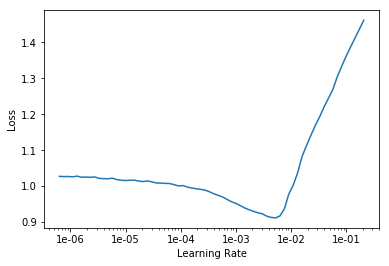

In [31]:
learn.lr_find()
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.015173,0.949688,0.808491,01:46
1,0.983152,0.892545,0.819332,01:47
2,0.940601,0.852859,0.837398,01:45
3,0.910192,0.845643,0.840108,01:45
4,0.887733,0.842251,0.844625,01:44


In [33]:
learn.save("/kaggle/working/large-wd-stage-2")